## Task 5: ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read deliveries dataset

deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
# read matches dataset

matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# Shape of the dataset

print('Shape of the deliveries data : ', deliveries.shape)
print('Shape of the matches data : ', matches.shape)

Shape of the deliveries data :  (179078, 21)
Shape of the matches data :  (756, 18)


In [5]:
# unique value of team 1

matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [6]:
#  unique value of team 2

matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [7]:
# replace team name

matches.replace(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
                 'Rising Pune Supergiant', 'Mumbai Indians',
                 'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
                 'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
                 'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
                 'Rising Pune Supergiants', 'Delhi Capitals'], 
                ['RCB', 'SRH', 'PW', 'MI', 'KKR', 'GL', 'KXIP', 'DD','CSK',
                 'RR', 'DC', 'KTK','PW','RPS','DC'],inplace =True)

In [8]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,PW,PW,field,normal,0,PW,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,PW,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
# unique values of batting team 

deliveries['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
# unique values of bowling team 

deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [11]:
deliveries.replace(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
                    'Rising Pune Supergiant', 'Mumbai Indians',
                    'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
                    'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
                    'Rising Pune Supergiants', 'Delhi Capitals'], 
                   ['RCB', 'SRH', 'PW', 'MI', 'KKR', 'GL', 'KXIP', 'DD','CSK',
                    'RR', 'DC', 'KTK','PW','RPS','DC'],inplace =True)

In [12]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [13]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [14]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [15]:
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [16]:
deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [17]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [18]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [19]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [20]:
matches1 = matches.drop(columns = ['umpire1', 'umpire2', 'umpire3'], axis = 1)
matches1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,MI,PW,PW,field,normal,0,PW,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,PW,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium


In [21]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [22]:
deliveries1 = deliveries.drop(columns = ['player_dismissed', 'dismissal_kind', 'fielder'])
deliveries1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [23]:
# season wise winner

winner = matches.groupby('season')['winner'].value_counts()
winner

season  winner
2008    RR        13
        KXIP      10
        CSK        9
        DD         7
        MI         7
                  ..
2019    KKR        6
        KXIP       6
        SRH        6
        RCB        5
        RR         5
Name: winner, Length: 100, dtype: int64

Text(0.5, 0, 'season')

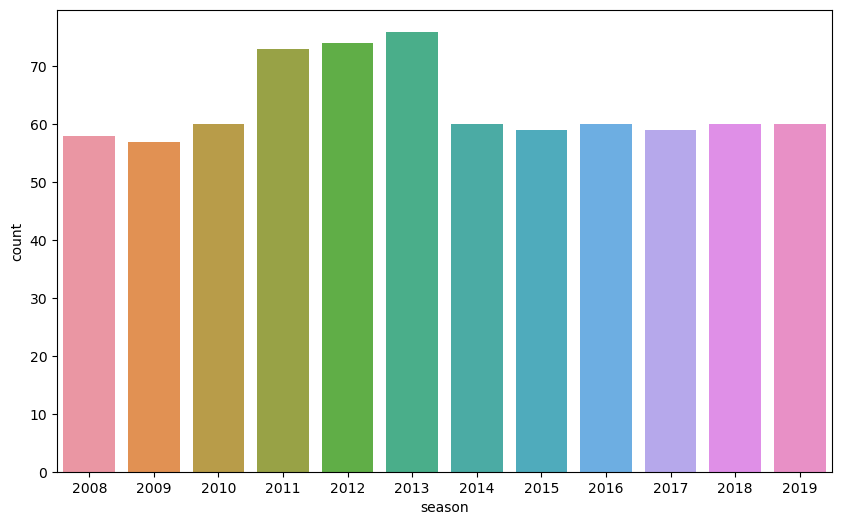

In [24]:
# number of matches played in each IPL season 

plt.figure(figsize = (10,6))
sns.countplot(x = 'season', data = matches)
plt.xlabel('season')

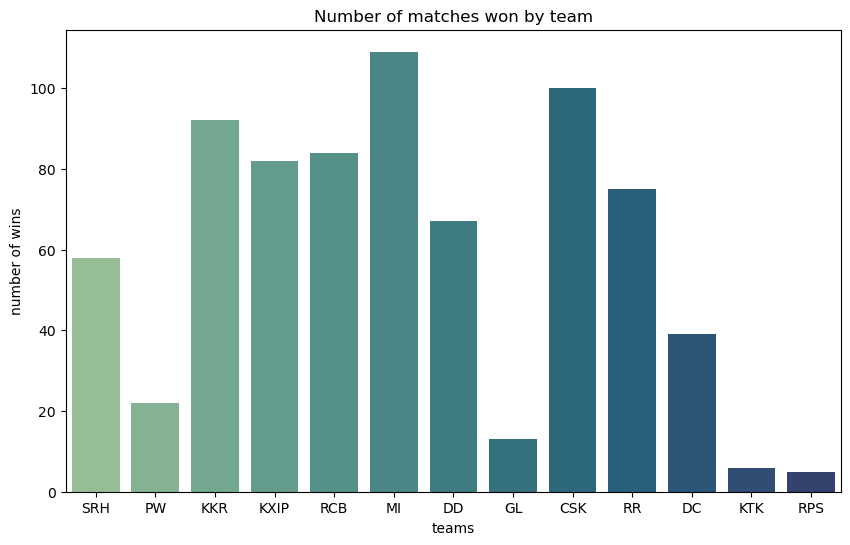

In [25]:
# numbers of matches won by team 

plt.figure(figsize = (10, 6))
sns.countplot(x = 'winner', data = matches, palette = 'crest')
plt.title('Number of matches won by team')
plt.xlabel('teams')
plt.ylabel('number of wins')
plt.show()

In [26]:
matches['win_by'] = np.where(matches['win_by_runs'] > 0, 'Bat first', 'Bowl first')

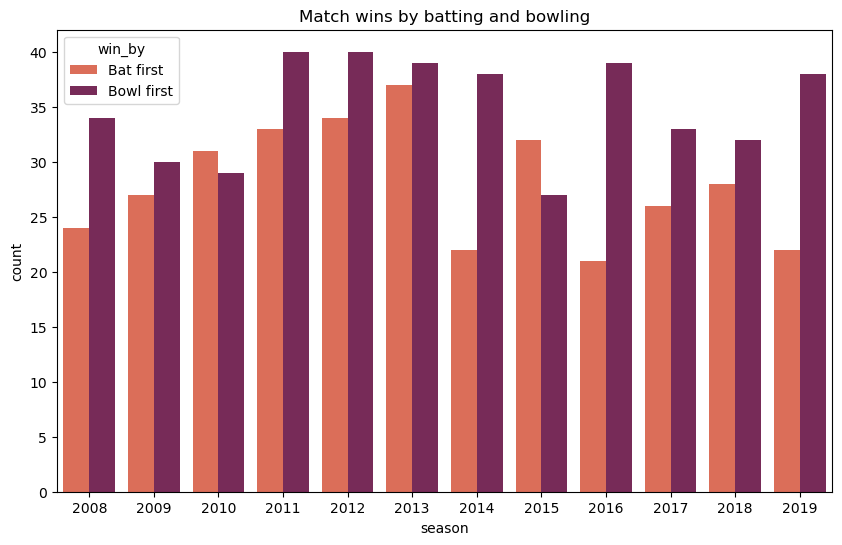

In [27]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'season', hue = 'win_by', data = matches, palette = 'rocket_r')
plt.title('Match wins by batting and bowling')
plt.xlabel('season')
plt.ylabel('count')
plt.show()

<AxesSubplot:xlabel='venue', ylabel='count'>

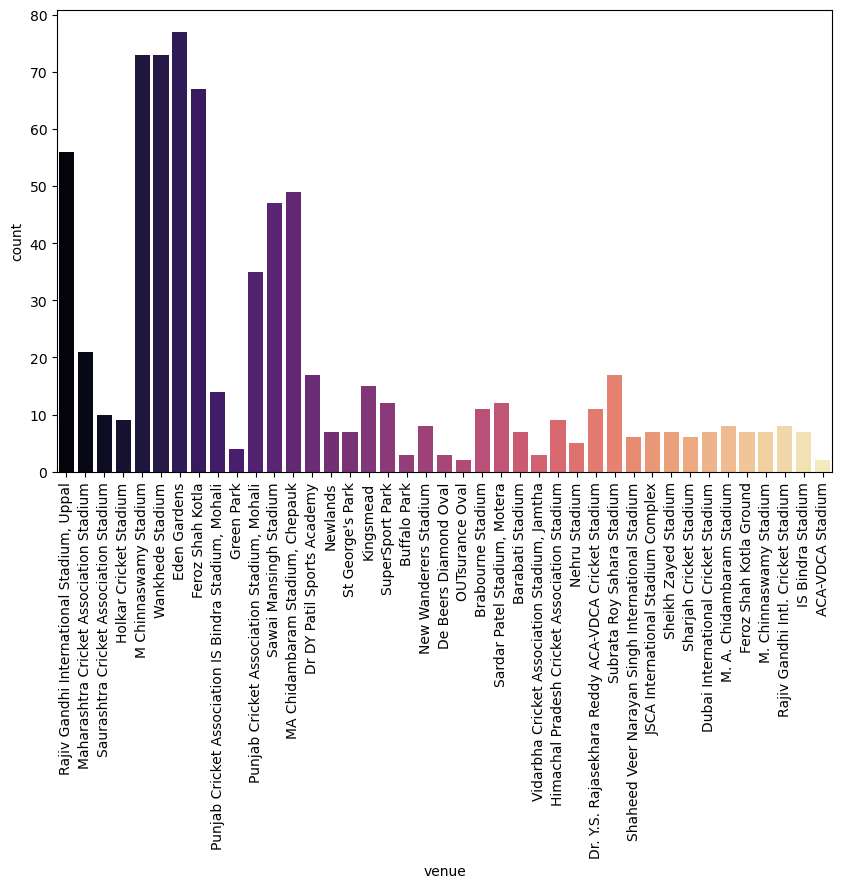

In [28]:
# number of matche played in the stadium

plt.figure(figsize = (10, 6))
plt.xticks(rotation = 90)
sns.countplot(x = 'venue', data = matches, palette = 'magma')

<Figure size 1000x600 with 0 Axes>

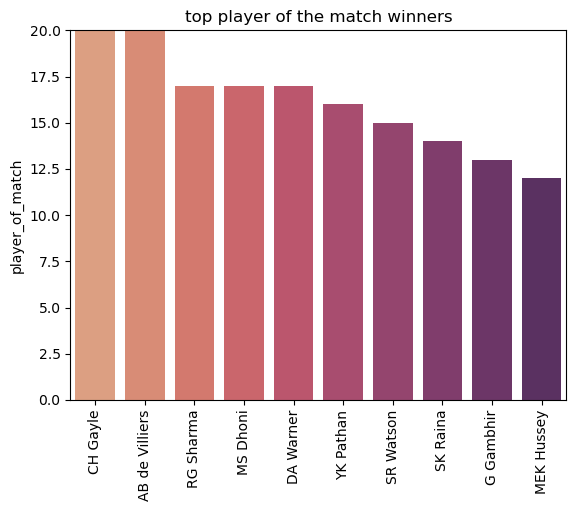

In [29]:
# names of the top players in the indian premier league

top_players = matches.player_of_match.value_counts()[:10]

plt.figure(figsize = (10, 6))
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel('count')
ax.set_title('top player of the match winners')
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient = 'v', palette = 'flare')
plt.show()

<AxesSubplot:xlabel='batsman', ylabel='batsman_runs'>

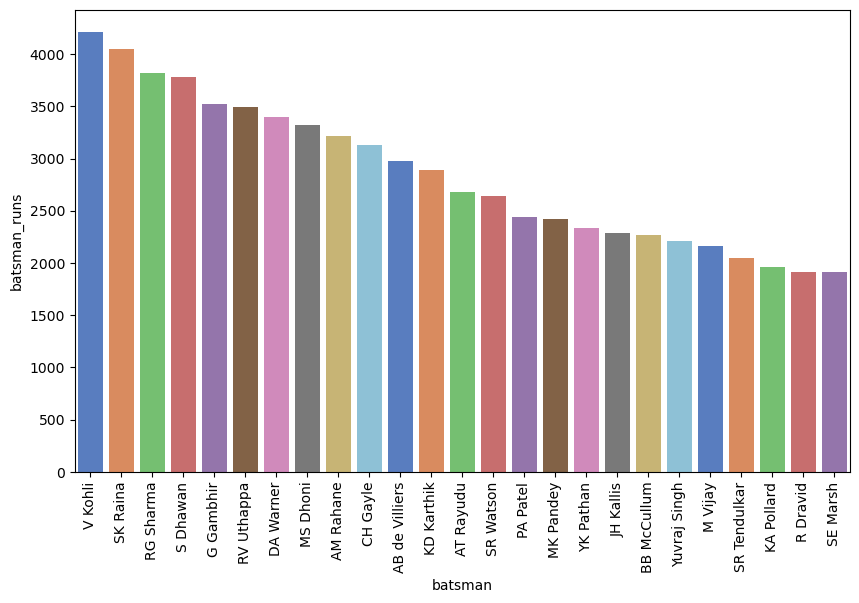

In [30]:
# name of the batsman who scored highest runs ib the ipl

matches_run = deliveries['batsman'].value_counts().reset_index()

plt.figure(figsize = (10, 6))
matches_run.columns = ['batsman', 'batsman_runs']
plt.xticks(rotation = 90)
sns.barplot(x = 'batsman', y = 'batsman_runs',  data = matches_run[:25], palette = 'muted')

Text(0, 0.5, 'No. of fours')

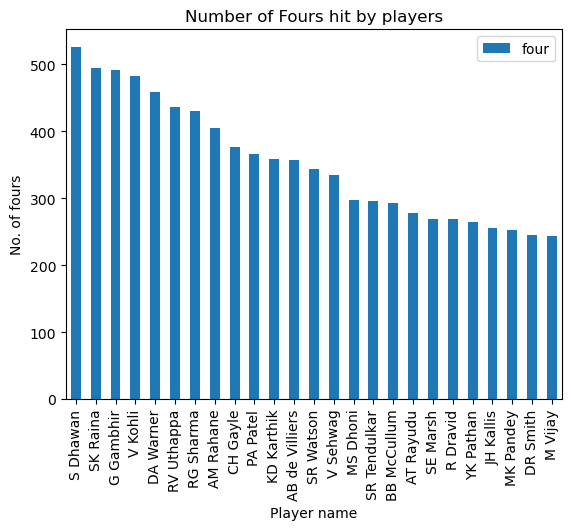

In [31]:
# counts of fours hit by the players

d4 = deliveries[deliveries['batsman_runs']==4]
batsman_4 = d4.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four', ascending=0)
ax = batsman_4.iloc[:25,:].plot('batsman','four',kind='bar')
plt.title("Number of Fours hit by players")
plt.xticks(rotation=90)
plt.xlabel("Player name")
plt.ylabel("No. of fours")

Text(0, 0.5, 'number of six')

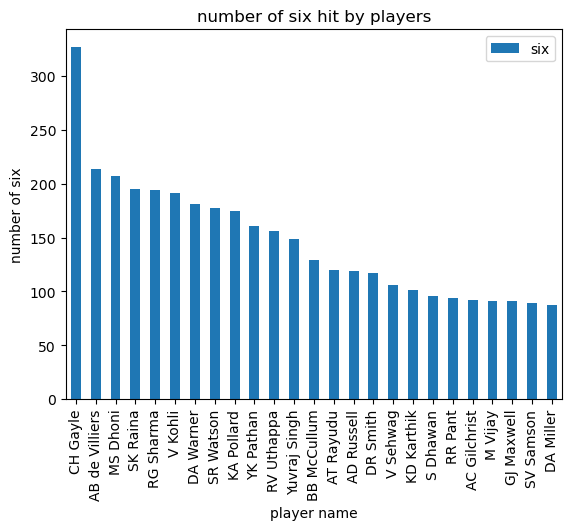

In [32]:
# counts of sixes hit by the players

d6 = deliveries[deliveries['batsman_runs']==6]
batsman_6 = d6.groupby('batsman')['batsman_runs'].agg([('six', 'count')]).reset_index().sort_values('six', ascending=0)
ax = batsman_6.iloc[:25, :].plot('batsman','six',kind='bar')
plt.title('number of six hit by players')
plt.xticks(rotation = 90)
plt.xlabel('player name')
plt.ylabel('number of six')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'PW'),
  Text(1, 0, 'KKR'),
  Text(2, 0, 'KXIP'),
  Text(3, 0, 'RCB'),
  Text(4, 0, 'SRH'),
  Text(5, 0, 'MI'),
  Text(6, 0, 'GL'),
  Text(7, 0, 'DD'),
  Text(8, 0, 'CSK'),
  Text(9, 0, 'RR'),
  Text(10, 0, 'DC'),
  Text(11, 0, 'KTK'),
  Text(12, 0, 'RPS')])

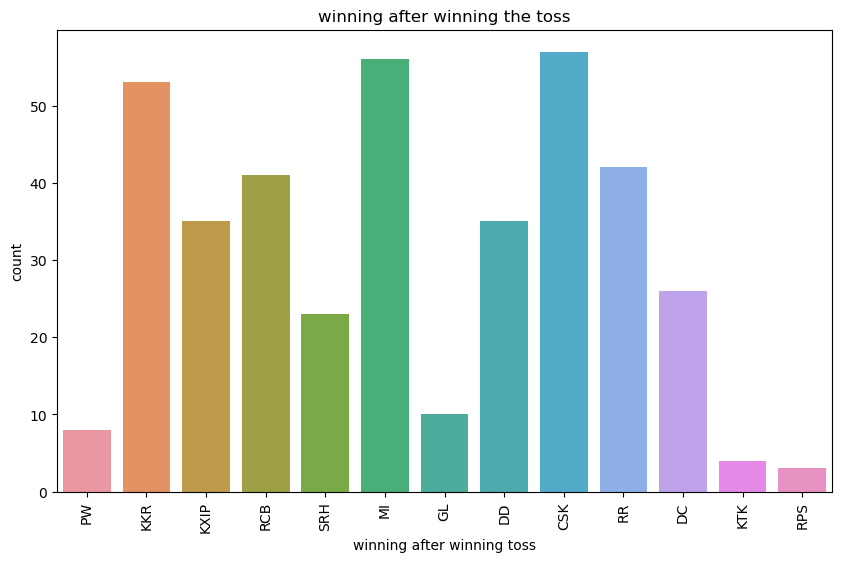

In [33]:
p = matches['winner']
q = matches['toss_winner']
r = p == q
w = pd.DataFrame({'winning after winning toss' : p, 'true/false' : r})
x = w['winning after winning toss']
y = w['true/false'] == True
z = x[y]

plt.figure(figsize=(10,6))
sns.countplot(z)
plt.title('winning after winning the toss')
plt.xticks(rotation = 90)

In [34]:
bat_first = matches[matches['win_by_runs'] != 0]
bat_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,win_by
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Bat first
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Bat first
8,9,2017,Pune,2017-04-11,DD,PW,PW,field,normal,0,DD,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN,Bat first
13,14,2017,Kolkata,2017-04-15,KKR,SRH,SRH,field,normal,0,KKR,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN,Bat first
14,15,2017,Delhi,2017-04-15,DD,KXIP,DD,bat,normal,0,DD,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN,Bat first


Text(0.5, 1.0, 'winner after batting first')

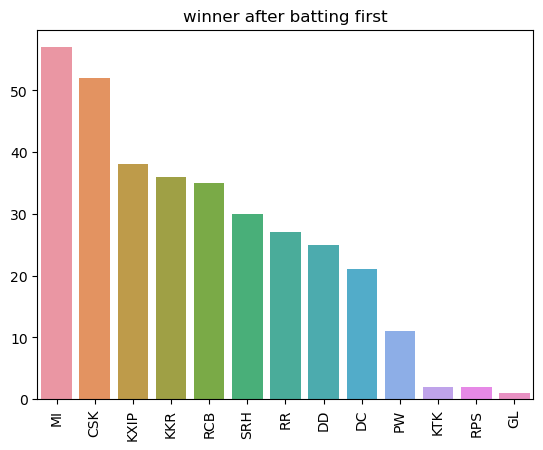

In [35]:
# p = bat_first['winner'].value_counts().head()
sns.barplot(bat_first['winner'].value_counts().index, bat_first['winner'].value_counts().values)
plt.xticks(rotation = 90)
plt.title('winner after batting first')

Text(0.5, 1.0, 'most played bowlers')

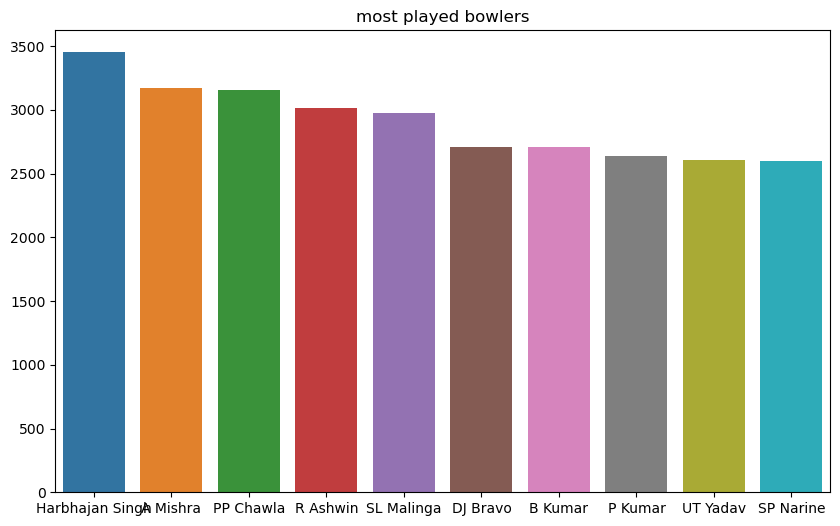

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(deliveries['bowler'].value_counts().head(10).index, deliveries['bowler'].value_counts().head(10).values)
plt.title("most played bowlers")

Text(0.5, 1.0, 'Players with most sixes')

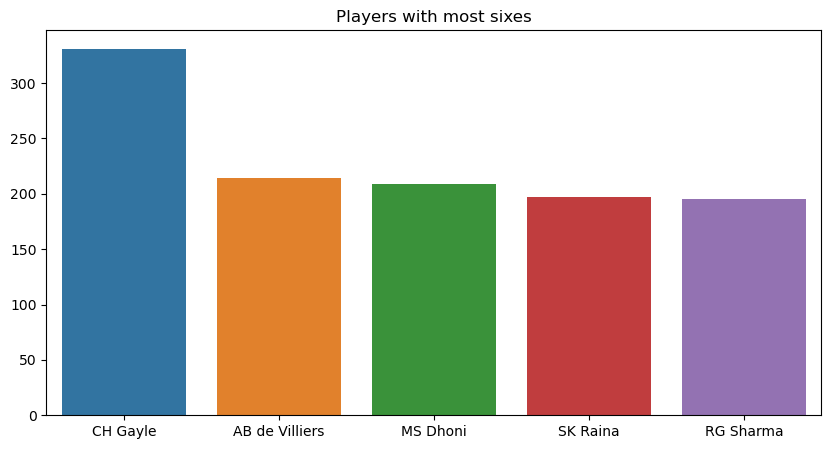

In [37]:
# players with most sixes

p = deliveries['batsman'][deliveries['total_runs']>=6].value_counts().head()
plt.figure(figsize=(10,5))
sns.barplot(p.index, p.values)
plt.title('Players with most sixes')

In [38]:
deliveries['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

(array([], dtype=float64), [])

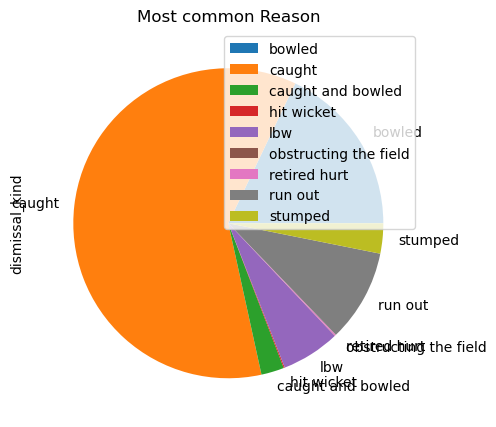

In [39]:
# most common reason

plt.figure(figsize = (5,15))
plt.title('Most common Reason')
deliveries.groupby('dismissal_kind')['dismissal_kind'].count().plot(kind='pie')
plt.legend()
plt.xticks(rotation = 90)

<AxesSubplot:title={'center':'bowlers who took most wickets'}>

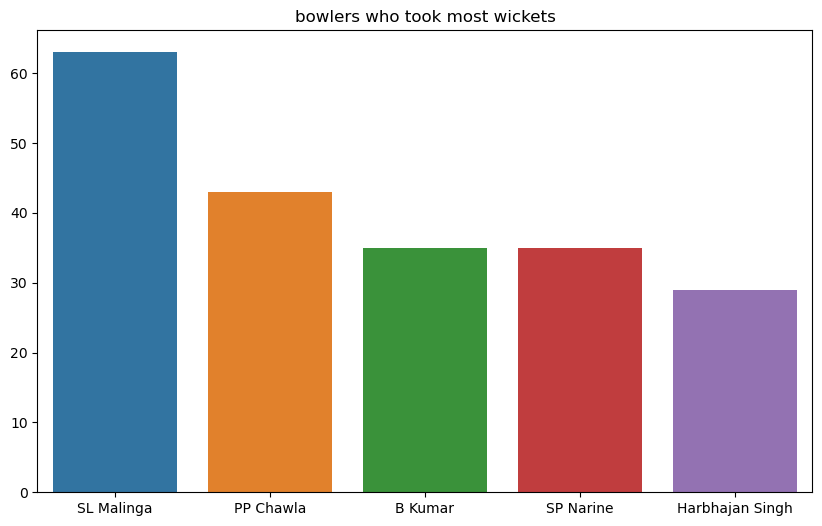

In [42]:
# p = deliveries['dismissal_kind'] == 'bowled'
# q = deliveries['bowler']
# r = q[p].value_counts().head()

r = deliveries['bowler'][deliveries['dismissal_kind'] == 'bowled'].value_counts().head()

plt.figure(figsize = (10,6))
plt.title('bowlers who took most wickets')
sns.barplot(r.index, r.values)

Text(0.5, 1.0, 'Filders with most catches')

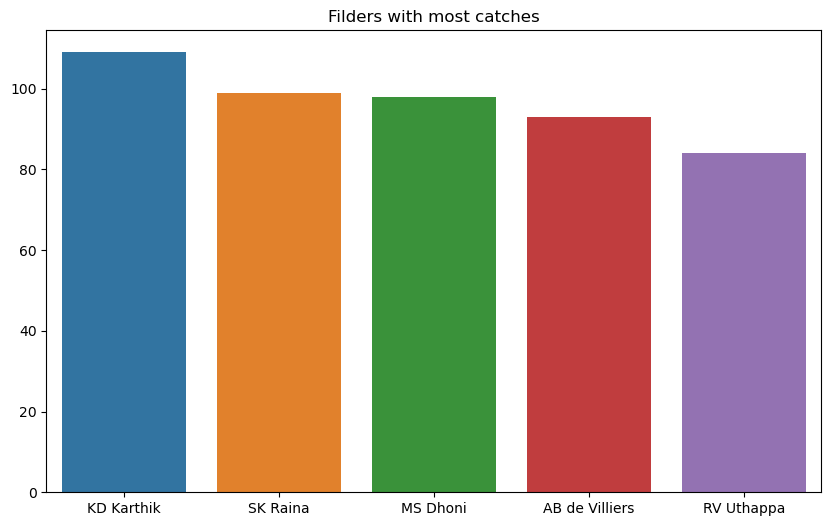

In [41]:
# p = deliveries['dismissal_kind']=='caught'
# q = deliveries['fielder']
# r = q[p]
# s = r.value_counts().head()

s = deliveries['fielder'][deliveries['dismissal_kind']=='caught'].value_counts().head()

plt.figure(figsize=(10,6))
sns.barplot(s.index, s.values)
plt.title("Filders with most catches")

Text(0.5, 1.0, 'Fielders who took most wickets')

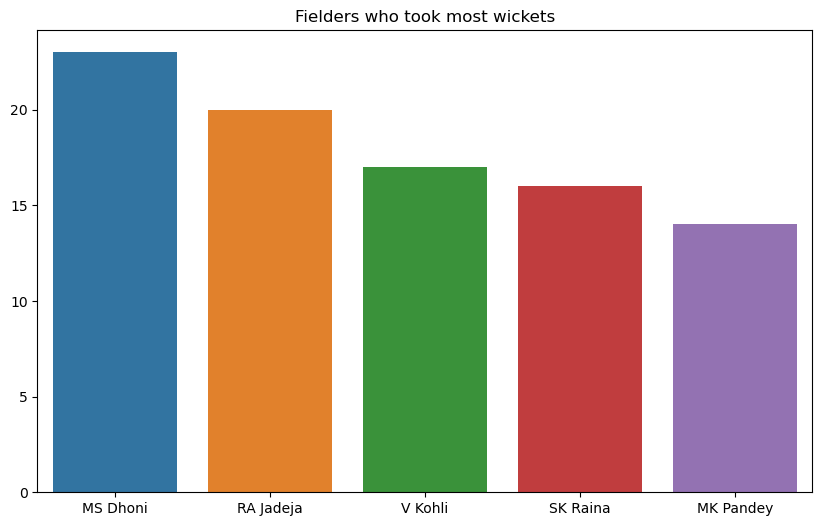

In [43]:
# p = deliveries['dismissal_kind']=='run out'
# q = deliveries['fielder']
# r = b[a]
# s = c.value_counts().head()

s = deliveries['fielder'][deliveries['dismissal_kind']=='run out'].value_counts().head()

plt.figure(figsize = (10,6))
sns.barplot(s.index, s.values)
plt.title("Fielders who took most wickets")

Text(0.5, 1.0, 'Fielders who stumped most')

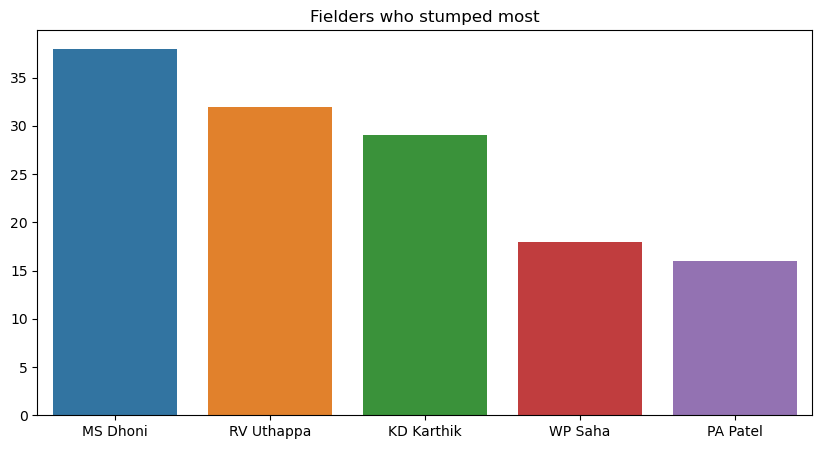

In [44]:
# p = deliveries['dismissal_kind'] == 'stumped'
# q = deliveries['fielder']
# r = q[p]
# s = c.value_counts().head()

s = deliveries['fielder'][deliveries['dismissal_kind'] == 'stumped'].value_counts().head()

plt.figure(figsize=(10,5))
sns.barplot(s.index, s.values)
plt.title('Fielders who stumped most')

### conclusion 

- highest number of matches played in season : 2013


- top player of the match winners : CH Gayel and AB de Villiers 


- highest number of decision after toss : fielding


- highest number of four hits - Shikher Dhawan


- most number of matches played in stadium: Eden Garden


- fielder who stumped the most : MS Dhoni


- bowling teams has higher percentage of winning then the batting teams


- highest number of match won by the team : MI


- highest wins after winning the toss by the team : CSK


- winning after batting first(highest) : MI


- filder with most catches - KD Karthik


- in final most teams after winning toss decide to do fielding first


- highest number of six hits - CH Gayle


- top player of match winning : CH Gayle


- top leading run score : Virat Kohli


- highest number of wickets by the bowler : SL Malinga


- most played bowler : Harbhajan Singh


- fieler who took most wickets : MS Dhoni


- In finals matches the teams which decide to do fielding first win the matches more then the team which bat first


- highest number of matches played : SK Raina